## WATER QUALITY PREDICTION MODEL

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [62]:
from tempfile import template

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from pyarrow.compute import scalar

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [63]:
df = pd.read_csv('data/water_potability .csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [64]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

#Data preprocessing

In [65]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [66]:
df.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [67]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

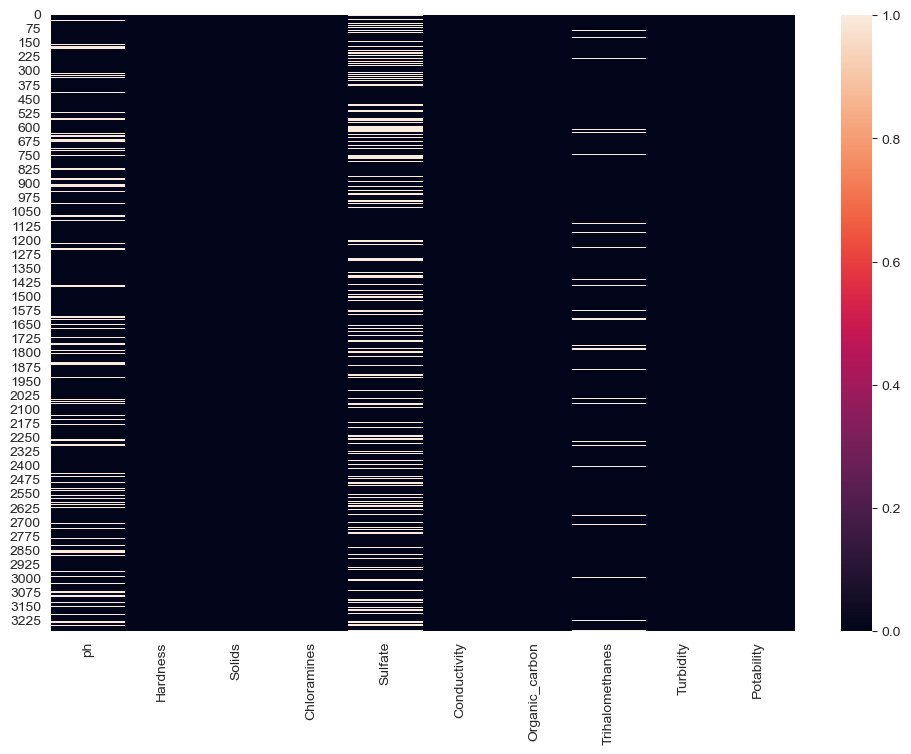

In [68]:
plt.figure(figsize=( 12,8))
sns.heatmap(df.isnull())

<Axes: >

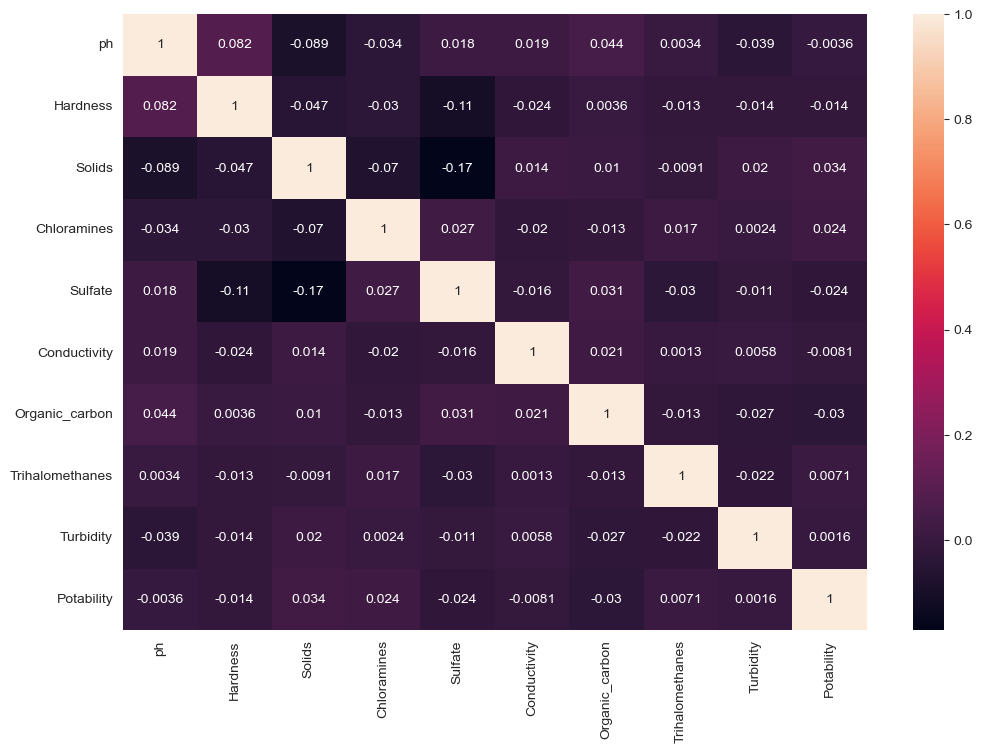

In [69]:
plt.figure(figsize=( 12,8))
sns.heatmap(df.corr(), annot= True)

<Axes: xlabel='Potability', ylabel='count'>

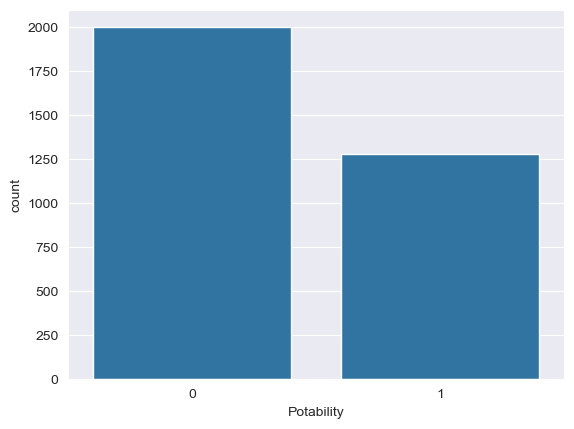

In [70]:
 sns.countplot(x= "Potability" , data=df)

In [71]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [72]:
# Data Visualization also check for outliers

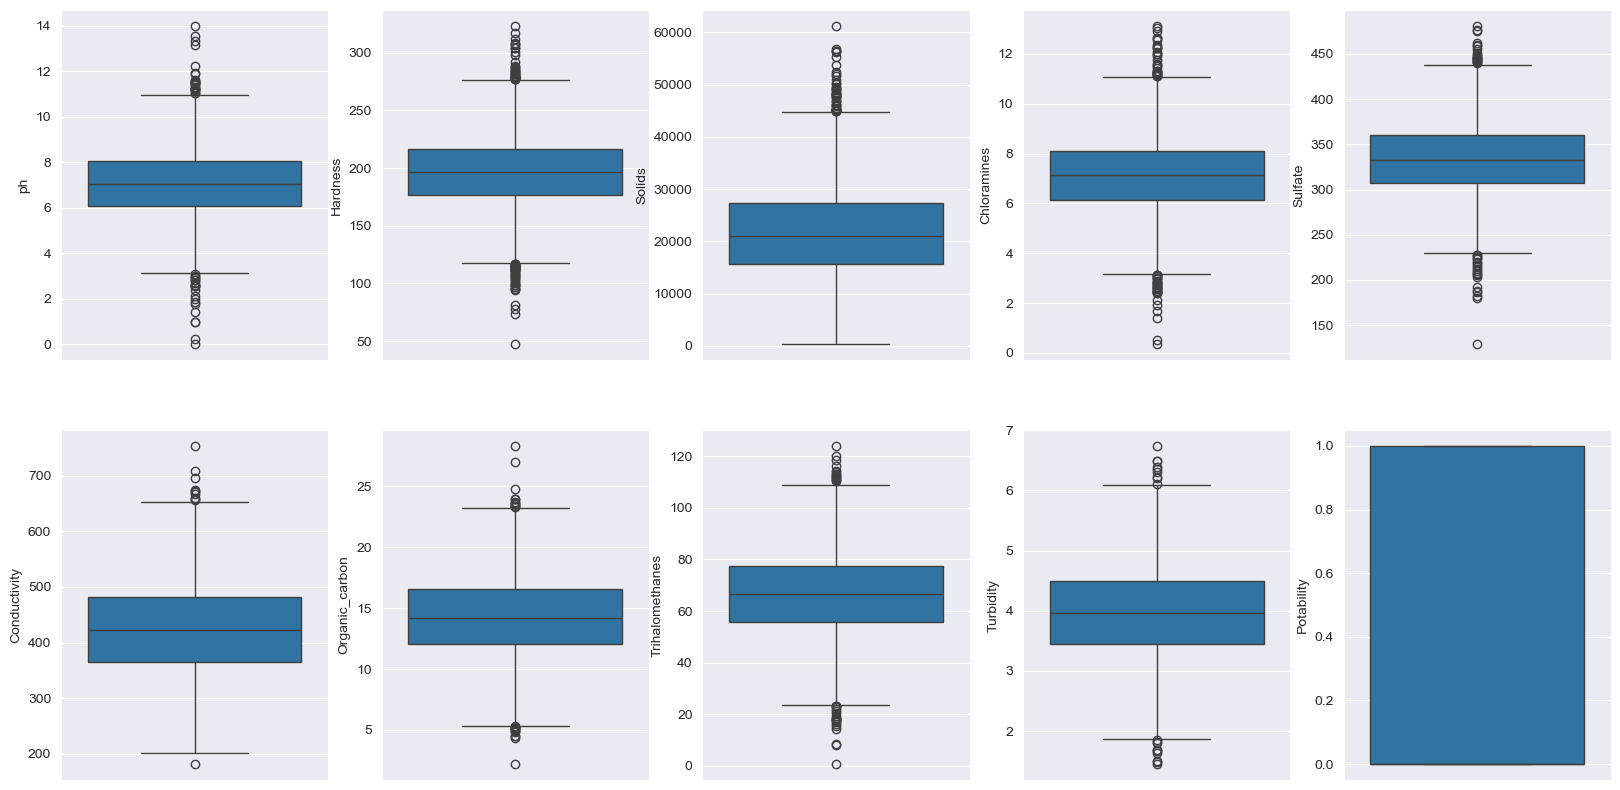

In [73]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
ax = ax.flatten()

index = 0

for col, values in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1


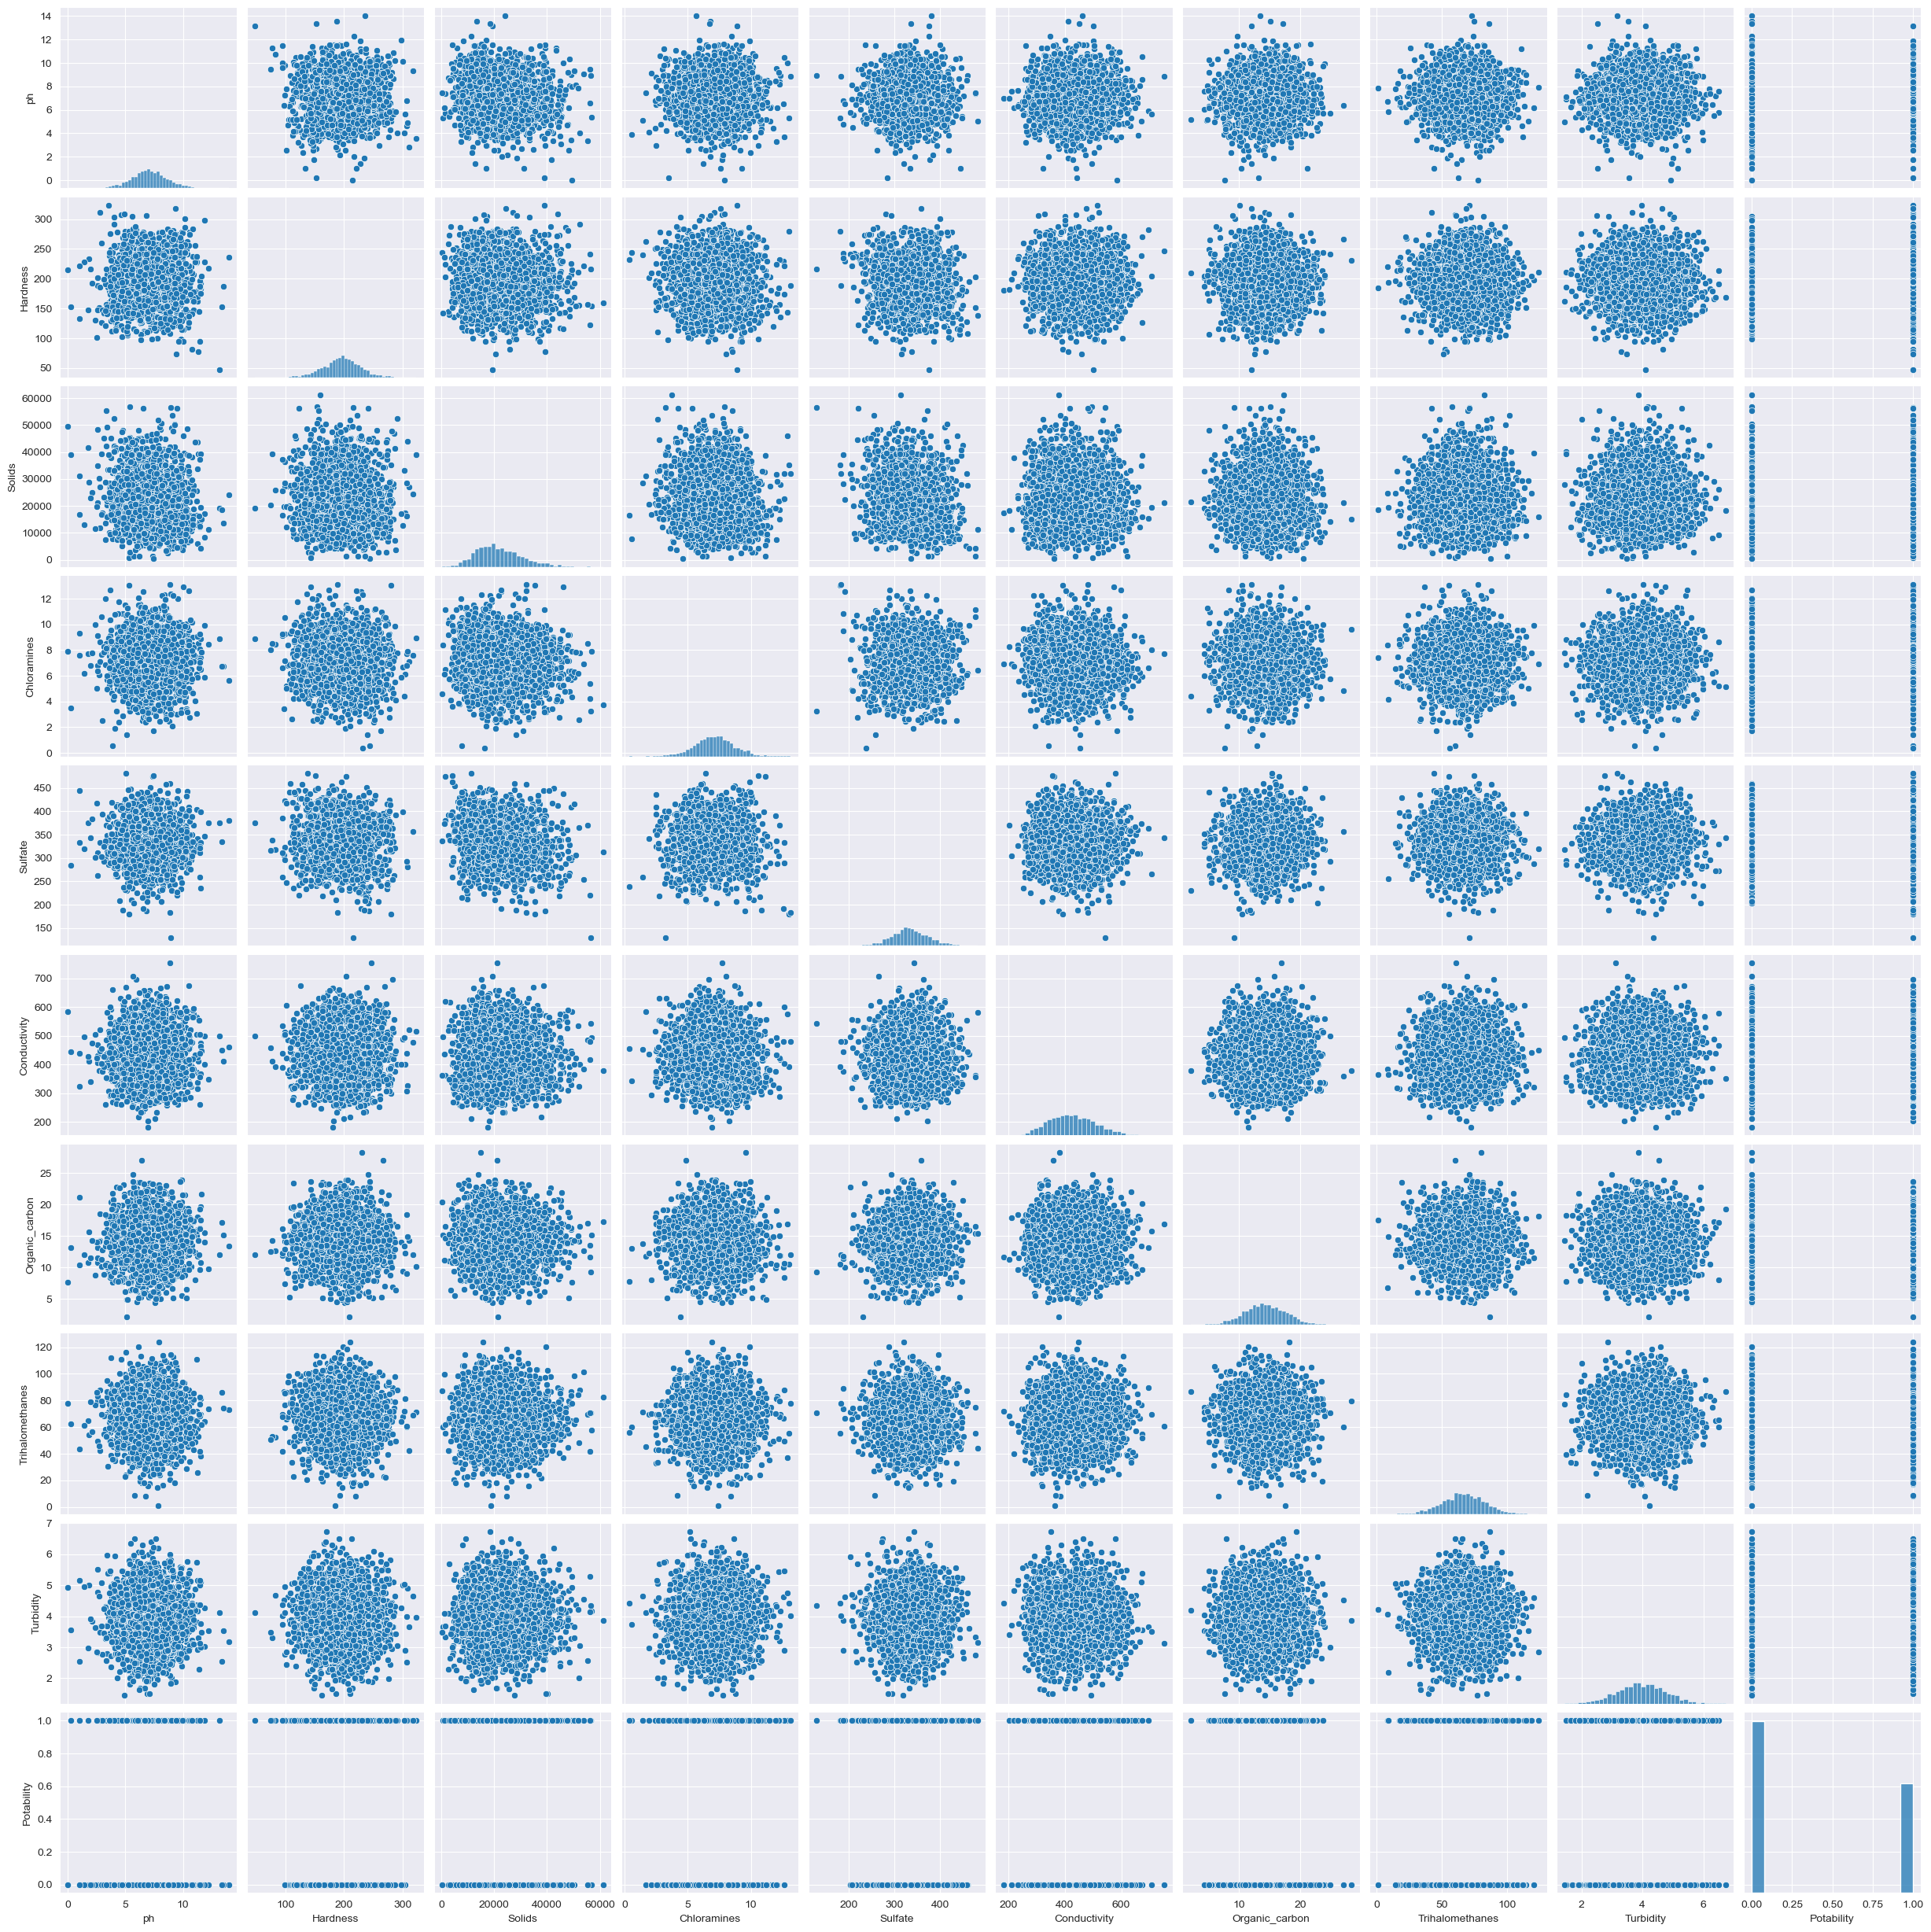

In [74]:
sns.pairplot(df)

In [75]:
fig = px.pie(df, names= "Potability", hole= 0.4, template="plotly_dark")
fig.show()

In [76]:
fig = px.scatter(df,x = "ph", y= "Sulfate",color = "Potability", template="plotly_dark")
fig.show()

In [77]:
fig = px.scatter(df,x = "Organic_carbon", y= "Hardness",color = "Potability", template="plotly_dark")
fig.show()

FILLING NULL VALUES IN WATER QUALITY PREDICTION

Text(0, 0.5, 'Percentage of missing values')

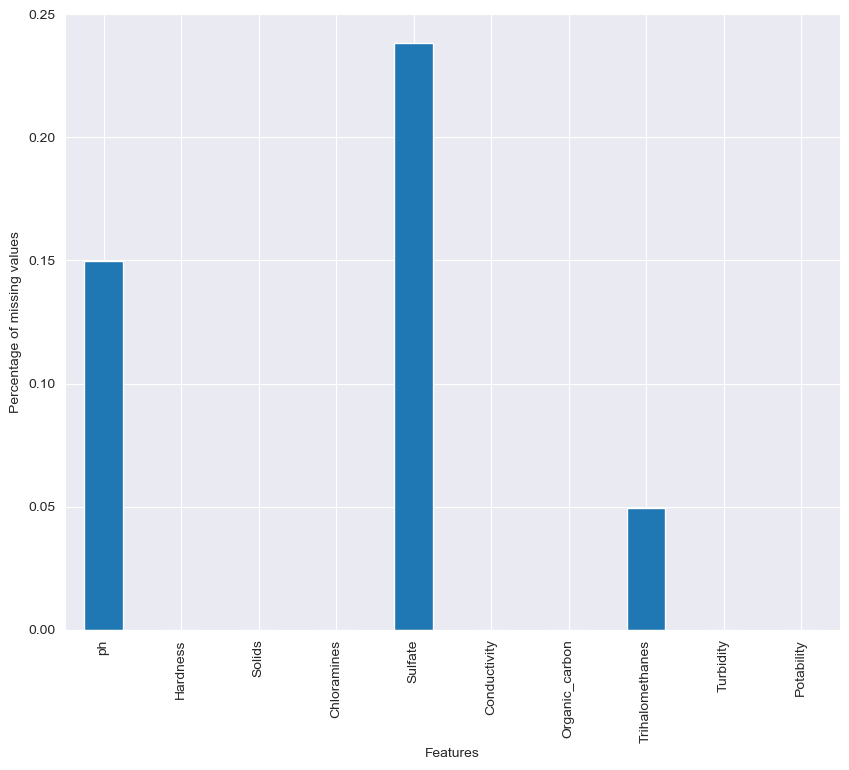

In [78]:
df.isnull().mean().plot.bar(figsize=(10,8))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [79]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())


In [80]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

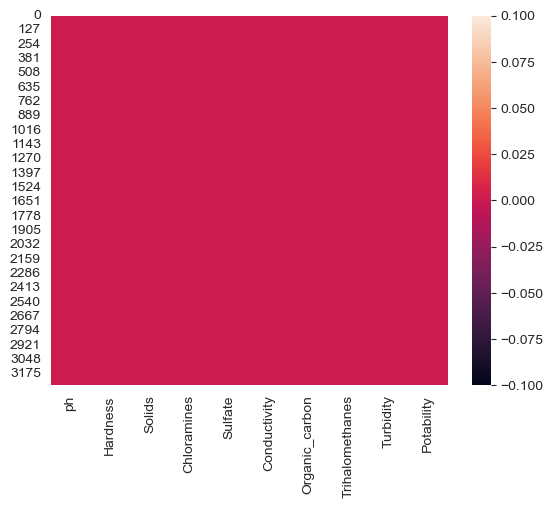

In [81]:
sns.heatmap(df.isnull())

Data preparation for training

In [82]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [83]:
x = df.drop("Potability", axis=1)
y = df["Potability"]

In [84]:
x.shape,y.shape

((3276, 9), (3276,))

In [85]:
scalar = StandardScaler()
x = scalar.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [87]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

LOGISTIC REGRESSION

In [88]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

In [89]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [90]:
# Making Prediction
pred_lr = model_lr.predict(x_test)

In [91]:
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr

0.5990853658536586

DECISION TREE CLASIFIER

## Use of Decision tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model_dt = grid_search.best_estimator_
y_pred = best_model_dt.predict(x_test)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.6400763358778626


In [93]:
#confusion matrix
cm2 = confusion_matrix(y_test,y_pred)
cm2

array([[307,  84],
       [173,  92]])

## RANDOM FOREST CLASSIFIER

In [94]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [95]:
#TRAINING THE MODEL RF

import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)


In [96]:
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)

In [97]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [98]:
pred_rf = model_rf.predict(x_test)


In [99]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)
accuracy_score_rf*100

67.07317073170732

In [100]:
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[342,  49],
       [167,  98]])

## USING KNN MODEL

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                               cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_knn.fit(x_train, y_train)

print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_knn.best_score_)

best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("Test Accuracy:", accuracy_score(y_test, y_pred_knn))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.6381679389312976

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       391
           1       0.52      0.34      0.41       265

    accuracy                           0.61       656
   macro avg       0.58      0.57      0.56       656
weighted avg       0.59      0.61      0.59       656

Test Accuracy: 0.6082317073170732


In [102]:
models

Model  Accuracy Score
0  Logistic Regression        0.599085
1        Decision Tree        0.611280
2        Random Forest        0.685976
3                  KNN        0.660061

Model  Accuracy Score
2        Random Forest        0.685976
3                  KNN        0.660061
1        Decision Tree        0.611280
0  Logistic Regression        0.599085

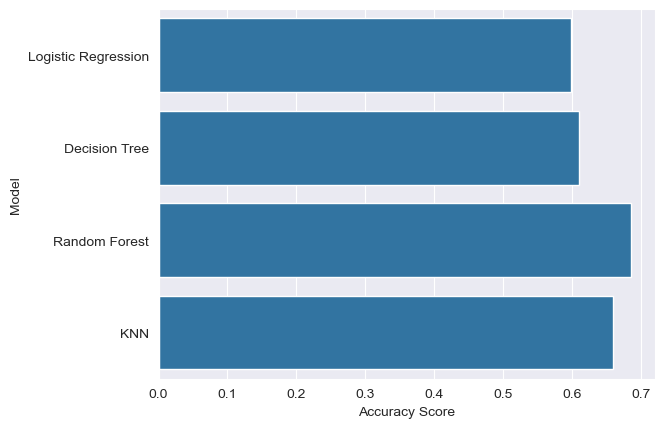

In [103]:
sns.barplot(x="Accuracy Score", y="Model", data=models)
models.sort_values(by="Accuracy Score", ascending=False)

In [104]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(x_train)

best_model = None
if max([accuracy_score_lr, accuracy_score_dt, accuracy_score_rf, accuracy_score_knn]) == accuracy_score_lr:
    best_model = model_lr
    best_model_name = "Logistic Regression"
elif max([accuracy_score_lr, accuracy_score_dt, accuracy_score_rf, accuracy_score_knn]) == accuracy_score_dt:
    best_model = model_dt
    best_model_name = "Decision Tree"
elif max([accuracy_score_lr, accuracy_score_dt, accuracy_score_rf, accuracy_score_knn]) == accuracy_score_rf:
    best_model = model_rf
    best_model_name = "Random Forest"
else:
    best_model = model_knn
    best_model_name = "KNN"

print(f"The best model selected is: {best_model_name}")

def predictive_system():
    print("\nEnter the water quality parameters:")
    ph = float(input("Enter the pH value: "))
    hardness = float(input("Enter the Hardness value: "))
    solids = float(input("Enter the Solids value: "))
    chloramines = float(input("Enter the Chloramines value: "))
    sulfate = float(input("Enter the Sulfate value: "))
    conductivity = float(input("Enter the Conductivity value: "))
    organic_carbon = float(input("Enter the Organic Carbon value: "))
    trihalomethanes = float(input("Enter the Trihalomethanes value: "))
    turbidity = float(input("Enter the Turbidity value: "))

    input_data = [[ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]]
    standardized_input = scalar.transform(input_data)
    prediction = best_model.predict(standardized_input)

    if prediction[0] == 1:
        print("\nThe water is SAFE for drinking.")
    else:
        print("\nThe water is NOT SAFE for drinking.")

predictive_system()


The best model selected is: Random Forest

Enter the water quality parameters:


KeyboardInterrupt: Interrupted by user